# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD13 <br>
Członkowie: Zuzanna Chmielarska, Sandra Głowacka, Zuzanna Brauer

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
bike_traffic_data = pd.read_pickle("bike_traffic_data.pkl")
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00,0.0,0.0,0.0
2022-01-01 01:00,0.0,0.0,0.0
2022-01-01 02:00,1.0,0.0,1.0
2022-01-01 03:00,0.0,0.0,0.0
2022-01-01 04:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 19:00,14.0,6.0,8.0
2022-12-31 20:00,20.0,13.0,7.0
2022-12-31 21:00,16.0,6.0,10.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                    Sky  
           Avg speed  Max speed Cloud cover  
Date                                         
2022-01-01  3.576311   5.364467         0.8  
2022-01-02  3.799831   8.940778         1.0  
2022-01-03  5.140947  11.623011         0.9  
2022-01-04  4.336277   9.834856         0.9  
2022-01-05  2.235194   4.470389         1.0  
...              ...        ...         ...  
2022-12-27  7.733773  16.540439         1.0  
2022-12-28  5.766802  12.517089         0.8  
2022-12-29  2.771641   7.599661         1.0  
2022-12-30  6.437360  11.623011         0.9  
2022-12-31  4.470389   9.387817         0.9  

[365 rows x 9 columns]

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy.

In [5]:
# Agregacja danych z poszczególnych dni roku
# YOUR CODE HERE
dates = pd.period_range(start='2022-01-01', end='2022-12-31', freq='D')
daily_bike_traffic_data = pd.DataFrame(index=dates, columns = ['Total', 'East', 'West'])

for date in dates:
    daily_bike_traffic_data.loc[date,'Total'] = np.sum(bike_traffic_data.loc[str(date),'Total'])
    daily_bike_traffic_data.loc[date,'East'] = np.sum(bike_traffic_data.loc[str(date),'East'])
    daily_bike_traffic_data.loc[date,'West'] = np.sum(bike_traffic_data.loc[str(date),'West'])

daily_bike_traffic_data.index.name = 'Date'
daily_bike_traffic_data = daily_bike_traffic_data.astype(float)
daily_bike_traffic_data.head(10).style.format(precision = 0)
daily_bike_traffic_data.to_pickle("daily_bike_traffic_data.pkl")

In [6]:
### Komórka testowa

# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(daily_bike_traffic_data.index, pd.PeriodIndex)
assert daily_bike_traffic_data.index.values.min() == pd.Period('2022-01-01', 'D')
assert daily_bike_traffic_data.index.values.max() == pd.Period('2022-12-31', 'D')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

In [7]:
# Agregacja danych z poszczególnych dni tygodnia
# YOUR CODE HERE
bike_traffic_by_weekday_data = daily_bike_traffic_data.copy()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_traffic_by_weekday_data.index = pd.Categorical(bike_traffic_by_weekday_data.index.to_timestamp().day_name(), categories = weekdays, ordered = True)
bike_traffic_by_weekday_data.index.name = 'Day'

bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.groupby('Day').mean()
bike_traffic_by_weekday_data.style.format(precision = 2)

,Total,East,West
Day,,,
Monday,2093.15,820.81,1272.35
Tuesday,2579.96,983.83,1596.13
Wednesday,2538.46,971.58,1566.88
Thursday,2406.71,926.60,1480.12
Friday,2087.44,843.54,1243.90
Saturday,1929.96,843.92,1086.04
Sunday,1664.44,771.58,892.87


In [8]:
### Komórka testowa

# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

In [9]:
# Agregacja danych z konkretnych okresów tygodnia (dzień roboczy/weekend)
# YOUR CODE HERE
dates = pd.period_range(start='2022-01-01', end='2022-12-31', freq='H')
weekday_weekend_hourly_bike_traffic_data = pd.DataFrame(index = range(24), columns = pd.MultiIndex.from_product([['Weekday', 'Weekend'], ['Total', 'East', 'West']]))
weekday_weekend_hourly_bike_traffic_data.index.name = 'Hour'

bike_traffic_data_copy = bike_traffic_data.copy()
bike_traffic_data_copy['Weekday'] =  bike_traffic_data.index.weekday

weekend = bike_traffic_data_copy.loc[bike_traffic_data_copy['Weekday'] >= 5][['Total', 'East', 'West']]
weekday = bike_traffic_data_copy.loc[bike_traffic_data_copy['Weekday'] < 5][['Total', 'East', 'West']]

weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekend', 'Total')] = weekend.groupby(weekend.index.hour).mean()['Total']
weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekend', 'East')] = weekend.groupby(weekend.index.hour).mean()['East']
weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekend', 'West')] = weekend.groupby(weekend.index.hour).mean()['West']
weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekday', 'Total')] = weekday.groupby(weekday.index.hour).mean()['Total']
weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekday', 'East')] = weekday.groupby(weekday.index.hour).mean()['East']
weekday_weekend_hourly_bike_traffic_data.loc[:, ('Weekday', 'West')] = weekday.groupby(weekday.index.hour).mean()['West']

weekday_weekend_hourly_bike_traffic_data = weekday_weekend_hourly_bike_traffic_data.astype(float)
weekday_weekend_hourly_bike_traffic_data.style.format(precision = 2)

In [10]:
### Komórka testowa

# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

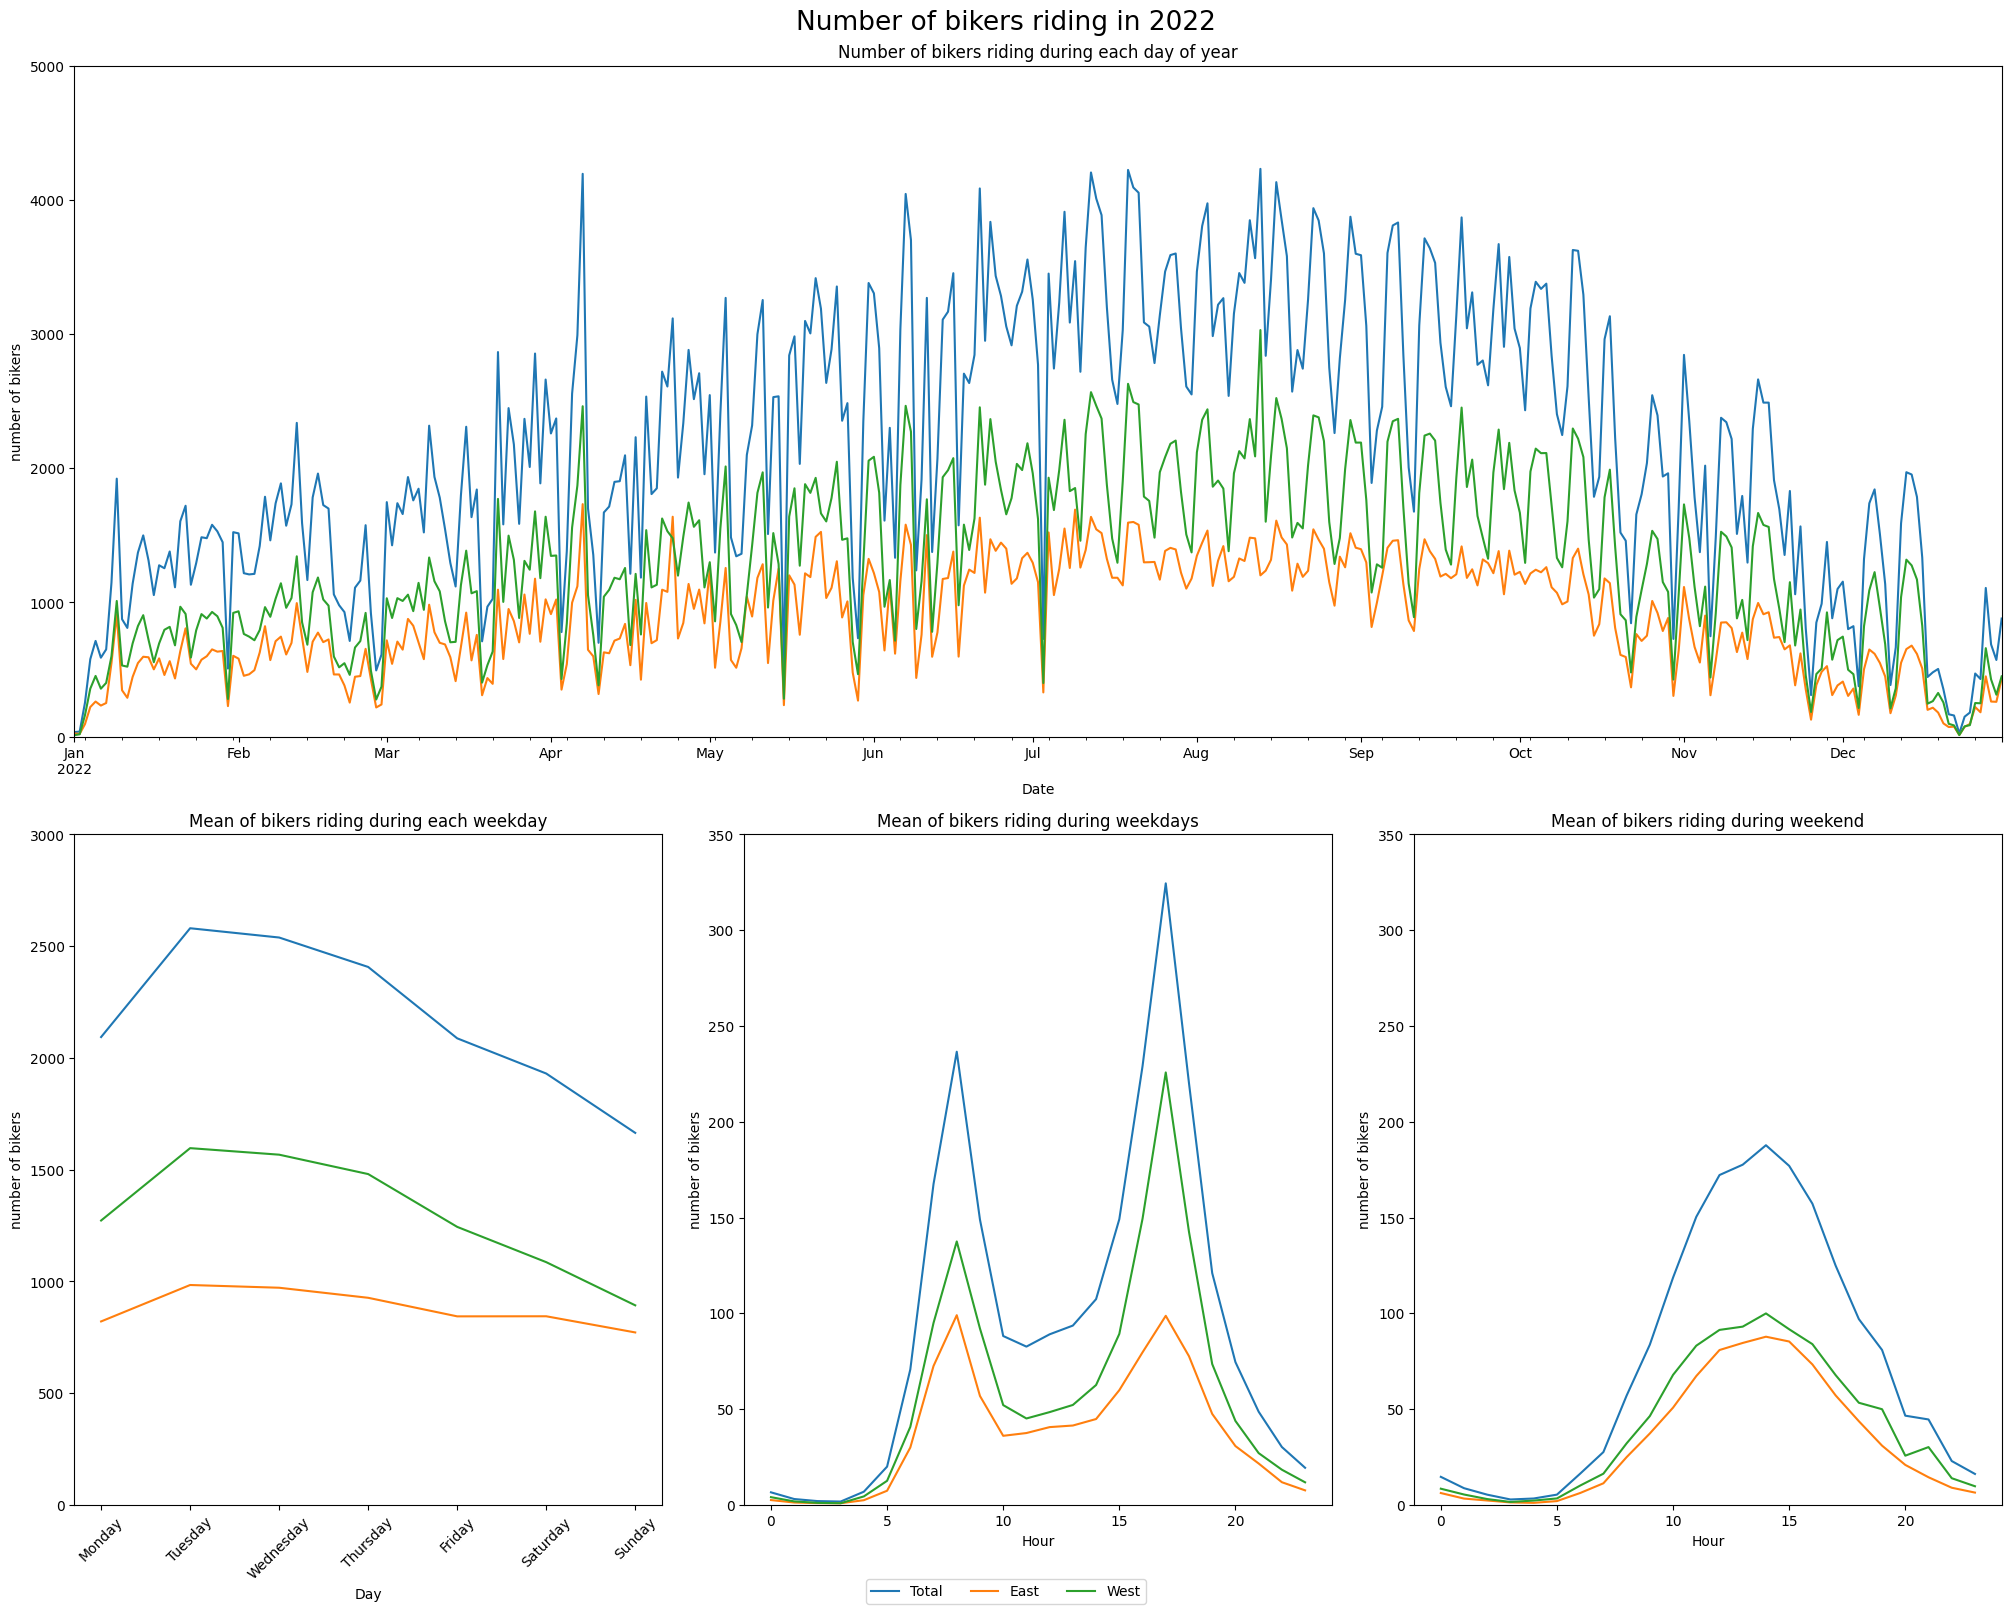

In [11]:
# YOUR CODE HERE
fig, ax = plt.subplot_mosaic(
    """
    AAA
    BCD
    """, figsize = (20,16), constrained_layout=True
)

daily_bike_traffic_data.plot(ax=ax['A'])
bike_traffic_by_weekday_data.plot(ax=ax['B'])
weekday_weekend_hourly_bike_traffic_data.loc[:, 'Weekday'].plot(ax=ax['C'])
weekday_weekend_hourly_bike_traffic_data.loc[:, 'Weekend'].plot(ax=ax['D'])

ax['A'].set_ylim(0,5000)
ax['A'].get_legend().remove()
ax['A'].set_ylabel('number of bikers')
ax['A'].set_title('Number of bikers riding during each day of year')
ax['B'].set_ylim(0,3000)
ax['B'].tick_params(axis='x', labelrotation = 45)
ax['B'].get_legend().remove()
ax['B'].set_ylabel('number of bikers')
ax['B'].set_title('Mean of bikers riding during each weekday')
ax['C'].set_ylim(0,350)
ax['C'].get_legend().remove()
ax['C'].set_ylabel('number of bikers')
ax['C'].set_title('Mean of bikers riding during weekdays')
ax['D'].set_ylim(0,350)
ax['D'].get_legend().remove()
ax['D'].set_ylabel('number of bikers')
ax['D'].set_title('Mean of bikers riding during weekend')

handles, labels = ax['D'].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'lower center', ncol = 3)
fig.suptitle('Number of bikers riding in 2022', fontsize = 19);

### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku.

In [12]:
weather_data_col=weather_data.columns
weather_data[('Snow','Depth')]=weather_data['Snow']['Depth'].fillna(0)
weather_data_copy=weather_data.copy()
weather_data_copy.index = weather_data_copy.index.strftime('%Y-%m')
grouped_weather = weather_data_copy.groupby(weather_data_copy.index)
monthly_weather_data=pd.DataFrame(columns=weather_data_col)
for month, value in grouped_weather:
    monthly_weather_data.loc[month,('Temperature','Min')]=value['Temperature']['Min'].min()
    monthly_weather_data.loc[month,('Temperature','Avg')]=value['Temperature']['Avg'].mean()
    monthly_weather_data.loc[month,('Temperature','Max')]=value['Temperature']['Max'].max()
    monthly_weather_data.loc[month,('Precipitation','Total')]=value['Precipitation']['Total'].sum()
    monthly_weather_data.loc[month,('Snow','Fall')]=value['Snow']['Fall'].sum()
    monthly_weather_data.loc[month,('Snow','Depth')]=value['Snow']['Depth'].mean()
    monthly_weather_data.loc[month,('Wind','Avg speed')]=value['Wind']['Avg speed'].mean()
    monthly_weather_data.loc[month,('Wind','Max speed')]=value['Wind']['Max speed'].max()
    monthly_weather_data.loc[month,('Sky','Cloud cover')]=value['Sky']['Cloud cover'].mean()
monthly_weather_data.index.name = 'Date'
monthly_weather_data.index = pd.PeriodIndex(monthly_weather_data.index, freq='M')
monthly_weather_data = monthly_weather_data.astype(float)
monthly_weather_data.style.format(precision = 2)

In [13]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(monthly_weather_data.index, pd.PeriodIndex) == True
assert monthly_weather_data.index.values.min() == pd.Period('2022-01', 'M')
assert monthly_weather_data.index.values.max() == pd.Period('2022-12', 'M')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 4.91612903, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

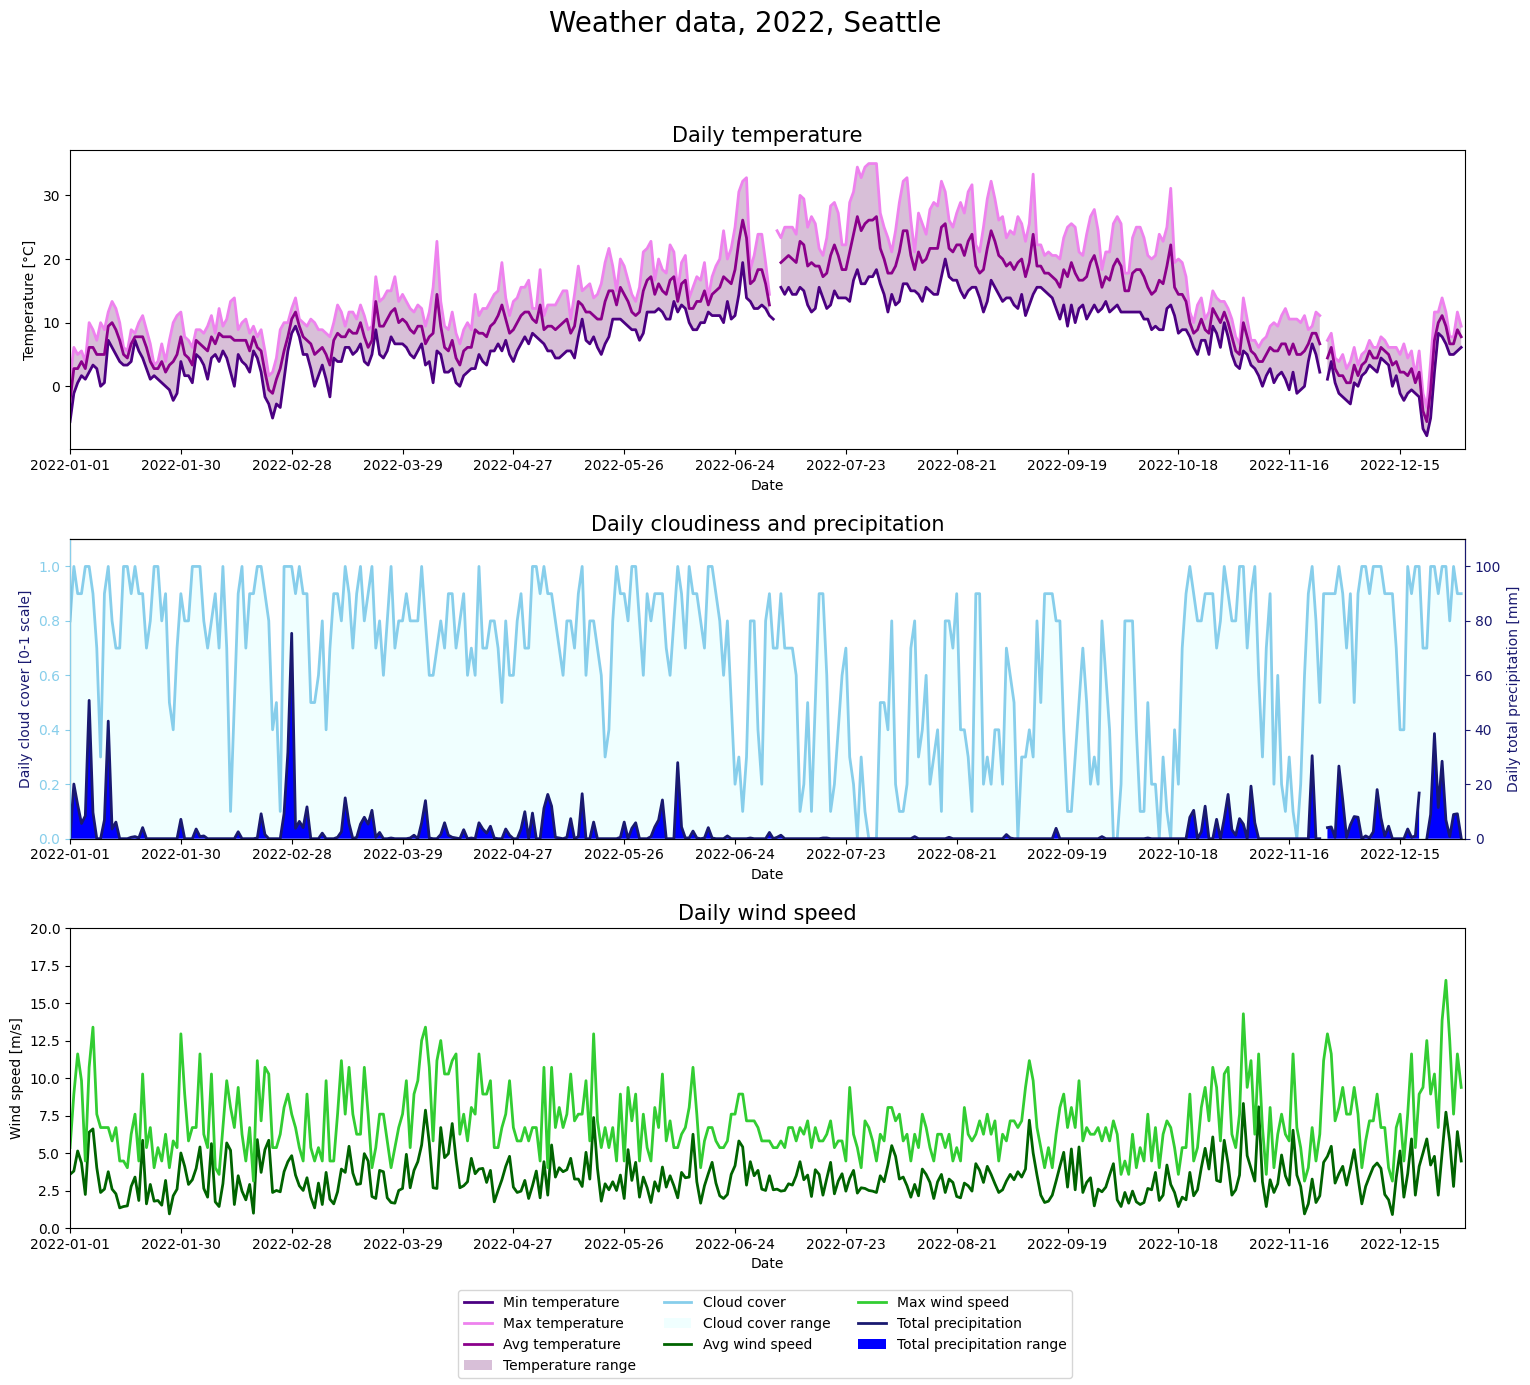

In [14]:
from matplotlib.ticker import MultipleLocator
fig,ax=plt.subplots(3,1,figsize=(18,14),facecolor='white')
fig.suptitle('Weather data, 2022, Seattle', fontsize=20)
plt.subplots_adjust(hspace=0.3)
x_locator = MultipleLocator(29) 
ax[0].plot(weather_data.index.astype(str), weather_data[('Temperature','Min')], color='indigo', linewidth=2, label='Min temperature')
ax[0].plot(weather_data.index.astype(str), weather_data[('Temperature','Max')], color='violet', linewidth=2, label='Max temperature')
ax[0].plot(weather_data.index.astype(str), weather_data[('Temperature','Avg')], color='darkmagenta', linewidth=2, label='Avg temperature')
ax[0].fill_between(weather_data.index.astype(str), weather_data[("Temperature", "Min")], weather_data[("Temperature", "Max")], facecolor="thistle", label='Temperature range')
ax[0].xaxis.set_major_locator(x_locator) 
ax[0].set_xlim(0,365)
ax[0].set_ylabel('Temperature [°C]',fontsize=10)
ax[0].set_xlabel('Date',fontsize=10)
ax[0].set_title('Daily temperature',fontsize=15)

ax[1].plot(weather_data.index.astype(str), weather_data[('Sky','Cloud cover')], color='skyblue', linewidth=2, label='Cloud cover')
ax[1].fill_between(weather_data.index.astype(str), weather_data[('Sky','Cloud cover')], np.linspace(0,0,365), facecolor="azure", label='Cloud cover range')
ax[1].set_ylim(0,1.1)
ax[1].tick_params(axis='y', colors='skyblue')
ax[1].set_ylabel('Daily cloud cover [0-1 scale]',fontsize=10, color='midnightblue')
ax[1].set_xlabel('Date',fontsize=10)
ax[1]=ax[1].twinx()
ax[1].plot(weather_data.index.astype(str), weather_data[('Precipitation','Total')], color='midnightblue', linewidth=2, label='Total precipitation')
ax[1].fill_between(weather_data.index.astype(str), weather_data[('Precipitation','Total')], np.linspace(0,0,365), facecolor="blue", label='Total precipitation range')
ax[1].xaxis.set_major_locator(x_locator) 
ax[1].set_xlim(0,365)
ax[1].set_ylim(0,110)
ax[1].tick_params(axis='y', colors='midnightblue')
ax[1].set_ylabel('Daily total precipitation [mm]',fontsize=10, color='midnightblue')
ax[1].spines['left'].set_color('skyblue')
ax[1].spines['right'].set_color('midnightblue')
ax[1].set_title('Daily cloudiness and precipitation',fontsize=15)

ax[2].plot(weather_data.index.astype(str), weather_data[('Wind','Avg speed')], color='darkgreen', linewidth=2, label='Avg wind speed')
ax[2].plot(weather_data.index.astype(str), weather_data[('Wind','Max speed')], color='limegreen', linewidth=2, label='Max wind speed')
ax[2].xaxis.set_major_locator(x_locator) 
ax[2].set_xlim(0,365)
ax[2].set_ylim(0,20)
ax[2].set_ylabel('Wind speed [m/s]',fontsize=10)
ax[2].set_xlabel('Date',fontsize=10)
ax[2].set_title('Daily wind speed',fontsize=15)

fig.legend(loc="lower center", ncols=3);